# Importing dataset

In [1]:
import pandas as pd
data = pd.read_csv(filepath_or_buffer="hr_data.csv", sep=";")
data.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [2]:
# Renaming some columns
data.rename(
    columns={
        'average_montly_hours': 'average_monthly_hours',
        'Work_accident': 'work_accident'},
    inplace=True
)
data.head()

,id,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


## Variables
- **satisfaction_level**: The level of satisfaction, happiness or motivation of the employee
- **last_evaluation**: The latest performance avaliation of the employee
- **average_monthly_hours**: The mean work hours in a month of the employee
- **time_spend_company**: The time, _in years_, that the employee has been with the company
- **work_accident**: If the employee has, or not, been into a work accident
- **left**: If the employee left the company
- **promotion_last_5years**: If the employee has been promoted over the last 5 years
- **salary**: The employee's salary range
- **num_project**: The number of projects that the employee has worked on
- **depto**: The department that the employee works or worked on

In [3]:
# Removing irrelevant columns
data.drop(columns=['id'], inplace=True)

# Exploratory Data Analysis

In [4]:
data.shape

(14999, 10)

We have **14,999** lines and **10** columns in the dataset.

## Is there null values?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   average_monthly_hours  14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   salary                 14999 non-null  object
 8   num_project            14999 non-null  int64 
 9   depto                  14999 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


In [6]:
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64


Observations:
- There are no null values along the dataset
- `satisfaction_level` and `last_evaluation` should have **float** values, but they are currently **strings**
    - These columns need to be converted to float type before any analysis.

## Fixing `satisfaction_level` and `last_evaluation` values

In [7]:
columns_float = ['satisfaction_level', 'last_evaluation']

for col in columns_float:
    data[col] = data[col].apply(lambda x: float(x.replace(',', '.')))

print(data.head())
print(data.info())

   satisfaction_level  last_evaluation  average_monthly_hours  \
0                0.38             0.53                    157   
1                0.80             0.86                    262   
2                0.11             0.88                    272   
3                0.72             0.87                    223   
4                0.37             0.52                    159   

   time_spend_company  work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   num_project  depto  
0            2  sales  
1            5  sales  
2            6  sales  
3            5  sales  
4            2  sales  
<c

In [8]:
data.describe()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612823,0.716102,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,0.248655,0.171169,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,0.010000,0.360000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,0.440000,0.560000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,0.640000,0.720000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,0.820000,0.870000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


In [9]:
columns_bool = []

for col in data.columns:
    unique_values = set(data[col])
    print(f"{col}: {list(unique_values)[:12]}")

    if unique_values == {0, 1}:
        columns_bool.append(col)

columns_cat = ['salary', 'depto']
columns_num = [col for col in data.columns if col not in columns_bool + columns_cat]
print(f"\nBoolean: {columns_bool}")
print(f"Categoric: {columns_cat}")
print(f"Numeric: {columns_num}")

satisfaction_level: [0.8, 0.72, 0.75, 0.25, 0.76, 0.51, 0.5, 0.27, 0.77, 0.78, 1.0, 0.21]
last_evaluation: [0.53, 0.86, 0.88, 0.52, 0.87, 0.5, 0.77, 0.85, 1.0, 0.54, 0.92, 0.59]
average_monthly_hours: [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
time_spend_company: [2, 3, 4, 5, 6]
work_accident: [0, 1]
left: [0, 1]
promotion_last_5years: [0, 1]
salary: ['low', 'medium', 'high']
num_project: [2, 3, 4, 5, 6]
depto: ['sales', 'hr', 'product_mng', 'technical', 'IT', 'marketing', 'management', 'accounting', 'support', 'RandD']

Boolean: ['work_accident', 'left', 'promotion_last_5years']
Categoric: ['salary', 'depto']
Numeric: ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'time_spend_company', 'num_project']


## Analyzing boolean columns

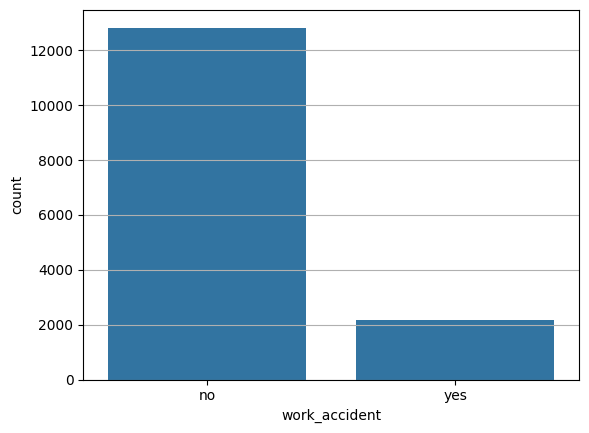

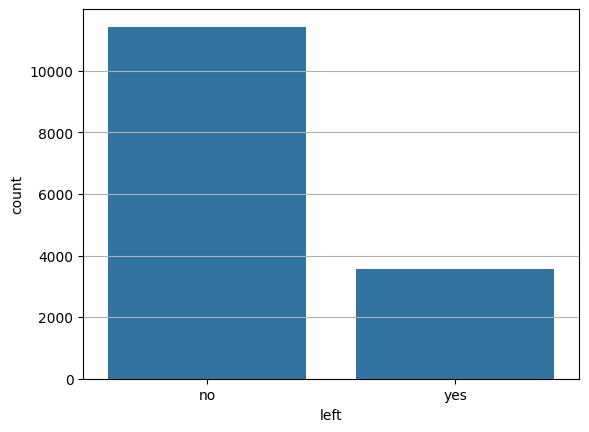

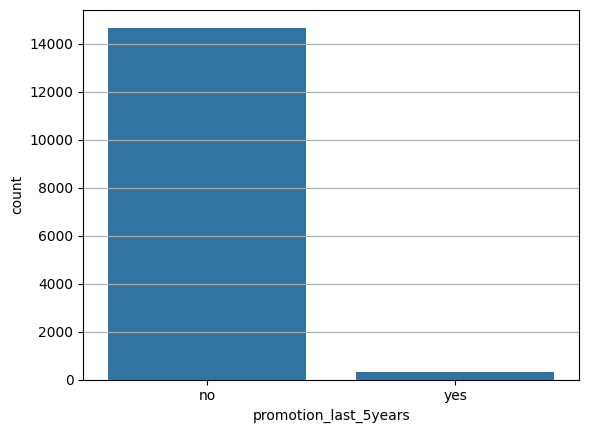

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in data[columns_bool].columns:
    sns.countplot(data=data, x=col)
    plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
    plt.grid(visible=True, axis='y')
    plt.show()

The boolean columns are very unbalanced. We have very few True values compared to False values. This suggests we need to be careful when choosing the model, as standard algorithms may not perform well on such imbalanced data.

## Analyzing categoric columns

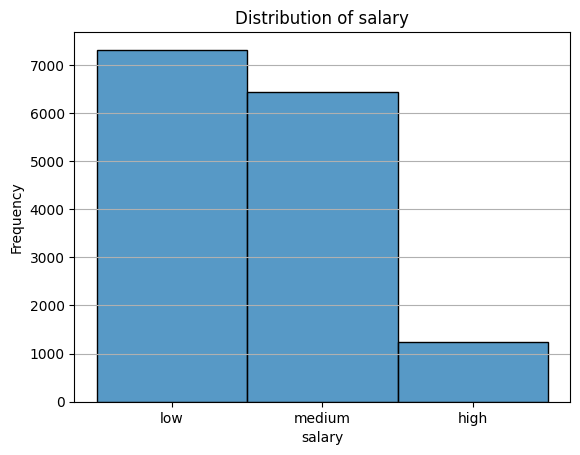

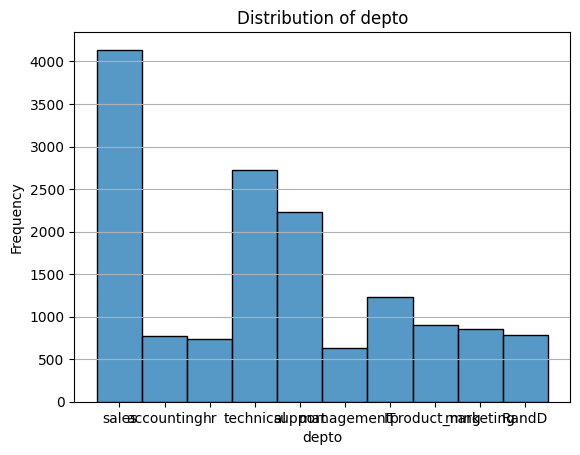

In [11]:
for col in data[columns_cat].columns:
    sns.histplot(data=data, x=col)
    plt.grid(visible=True, axis='y')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Analyzing numeric columns

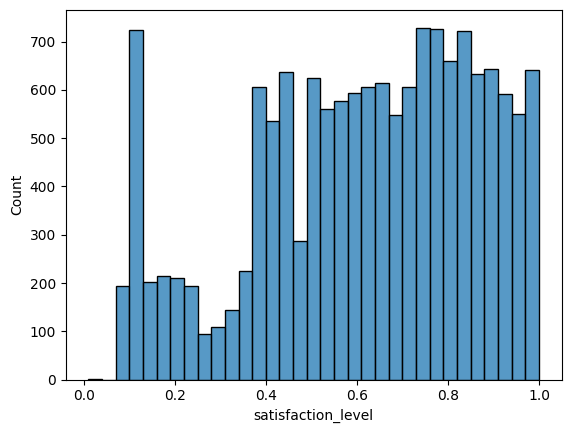

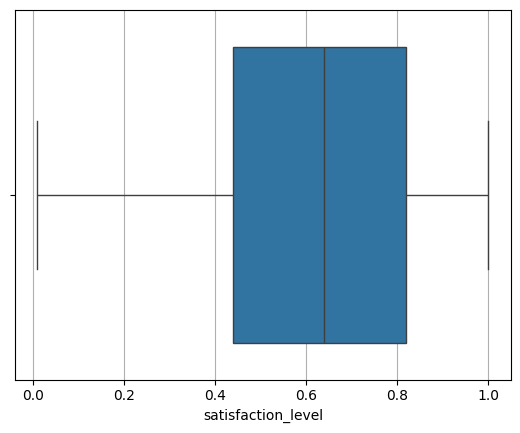

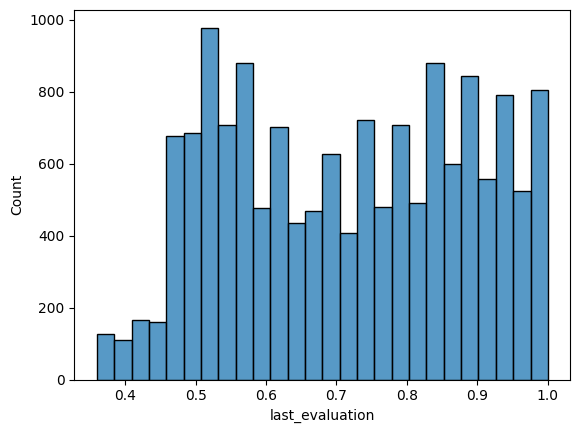

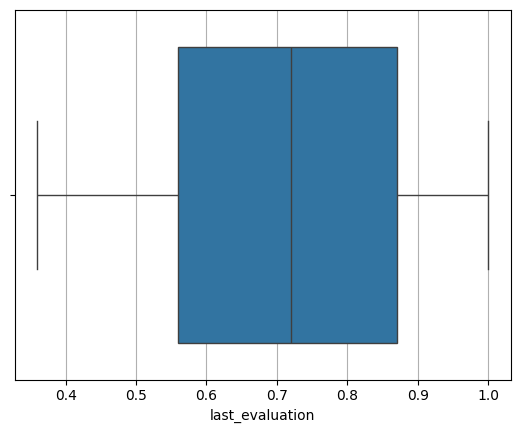

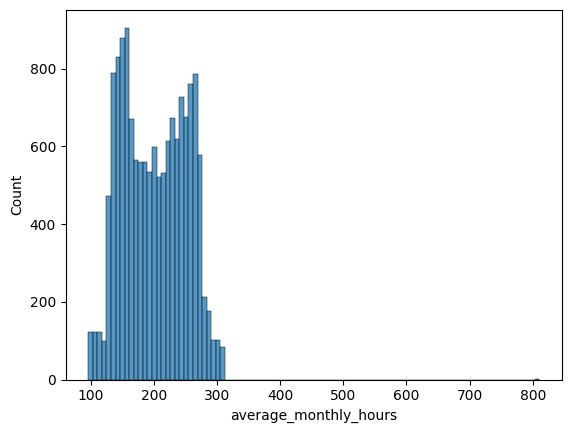

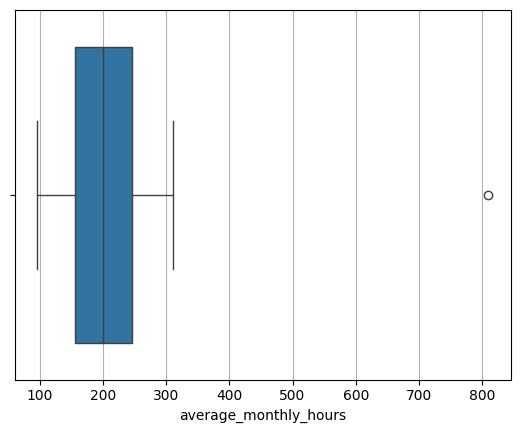

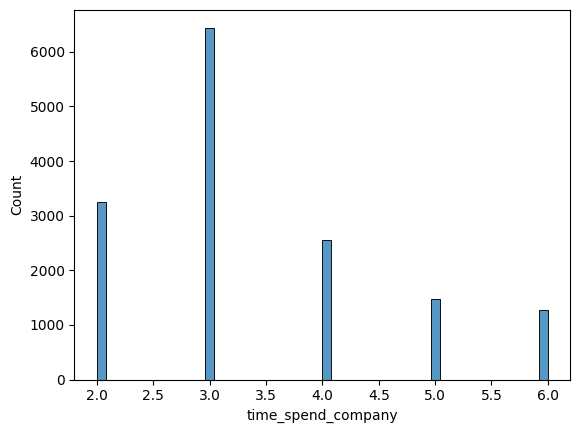

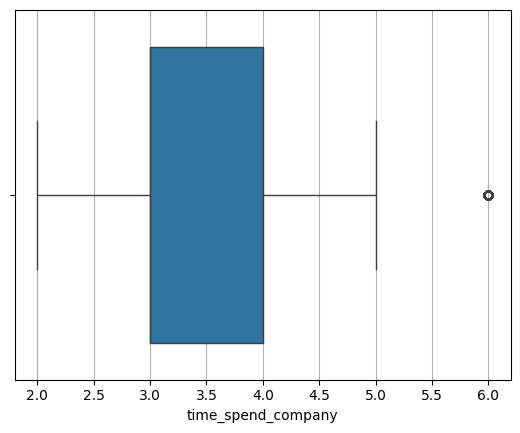

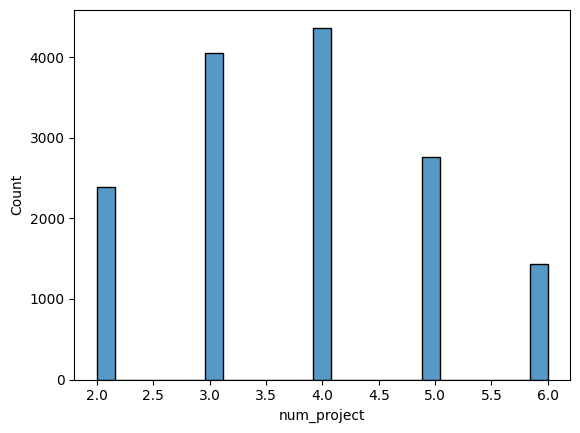

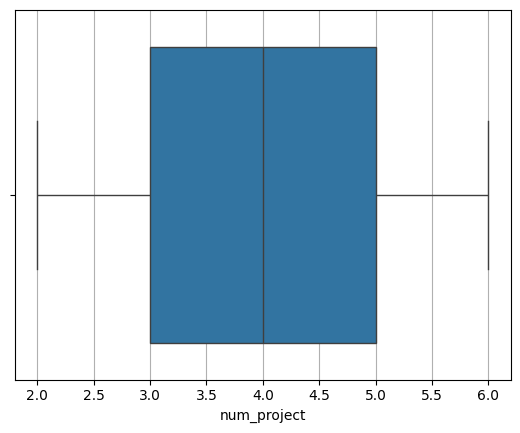

In [12]:
for col in data[columns_num].columns:
    sns.histplot(data=data, x=col)
    plt.show()

    sns.boxplot(data=data, x=col)
    plt.grid(visible=True, axis='x')
    plt.show()

Observations:
- There's an outlier value at `average_monthly_hours`
- There are some possible outlier values at `time_spend_company`

### Checking outliers in numerical columns

#### `average_monthly_hours`

In [ ]:
# Showing the 5 rows with biggest value in `average_monthly_hours`
data.nlargest(5, 'average_monthly_hours')

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,depto
14972,0.11,0.97,810,4,0,1,0,medium,6,accounting
566,0.11,0.79,310,4,0,1,0,low,6,hr
803,0.10,0.77,310,4,0,1,0,medium,6,technical
809,0.11,0.97,310,4,0,1,0,medium,6,support
1059,0.70,0.93,310,3,0,1,0,low,2,product_mng


That's for sure an outlier, since it's the only value and it's humanly impossible to have 810 average monthly hours of work. This employee would have to work 24/7 for almost 34 days, or work for 27 hours a day every single day.

##### Possible strategies for dealing with this outlier:

- Remove the outlier
- Cap the value at a reasonable threshold
- Impute the value with the median or mean of the column

Since that's the only discrepant value among all of this employee's data, it's safe to replace it with the mean value of the column.

In [14]:
# data['average_monthly_hours'][14972] = int(data['average_monthly_hours'].mean())
data.loc[14972, 'average_monthly_hours'] = int(data['average_monthly_hours'].mean())
data.loc[14972]

satisfaction_level             0.11
last_evaluation                0.97
average_monthly_hours           201
time_spend_company                4
work_accident                     0
left                              1
promotion_last_5years             0
salary                       medium
num_project                       6
depto                    accounting
Name: 14972, dtype: object

#### `time_spend_company`

In [15]:
data.loc[data['time_spend_company'] == 6]

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,depto
1,0.80,0.86,262,6,0,1,0,medium,5,sales
17,0.78,0.99,255,6,0,1,0,low,4,sales
34,0.84,0.87,246,6,0,1,0,low,4,hr
47,0.57,0.70,273,6,0,1,0,low,3,support
67,0.90,0.98,264,6,0,1,0,medium,4,product_mng
...,...,...,...,...,...,...,...,...,...,...
14942,0.20,0.50,135,6,0,1,0,low,5,RandD
14947,0.91,0.98,242,6,0,1,0,low,4,support
14977,0.81,0.85,251,6,0,1,0,medium,4,hr
14986,0.85,0.85,247,6,0,1,0,low,4,technical


There are **1282** employees with 6 years of company time. This is a significant amount, so they are not outliers.

## Preparing data before a deep analysis

### Converting `salary` values to ordinal values

In [16]:
salary_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}

data['salary'] = data['salary'].map(salary_mapping)
data.head()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,depto
0,0.38,0.53,157,3,0,1,0,0,2,sales
1,0.80,0.86,262,6,0,1,0,1,5,sales
2,0.11,0.88,272,4,0,1,0,1,6,sales
3,0.72,0.87,223,5,0,1,0,0,5,sales
4,0.37,0.52,159,3,0,1,0,0,2,sales


### Transforming `depto` in multiple boolean columns

In [17]:
df = pd.get_dummies(data, columns=['depto'], prefix='dept')
df.head()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,157,3,0,1,0,0,2,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,262,6,0,1,0,1,5,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,272,4,0,1,0,1,6,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,223,5,0,1,0,0,5,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,159,3,0,1,0,0,2,False,False,False,False,False,False,False,True,False,False


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_dept = [col for col in df.columns if col.startswith('dept_')]

for col in columns_dept:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,157,3,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,262,6,0,1,0,1,5,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,272,4,0,1,0,1,6,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,223,5,0,1,0,0,5,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,159,3,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0


## Starting deep analysis

### Questions
- What factors most influence salary?
    - Does more hours worked result in higher salary?
    - Does more years at the company result in higher salary?
- Which department has the highest salaries?
- What factors most influence satisfaction level?
    - Does higher salary lead to higher satisfaction?
    - Does receiving a promotion have an impact on satisfaction?
- What factors most influence performance evaluation?
    - Does higher salary result in better performance?
    - Does receiving a promotion have an impact on performance?
- What causes employees to leave the company?
    - Is there any relationship between satisfaction level and the probability of an employee leaving the company?
- Are there significant differences in the characteristics of employees who stand out compared to those who don't?
- What are the principal variables that predict the chance of an employee being promoted?

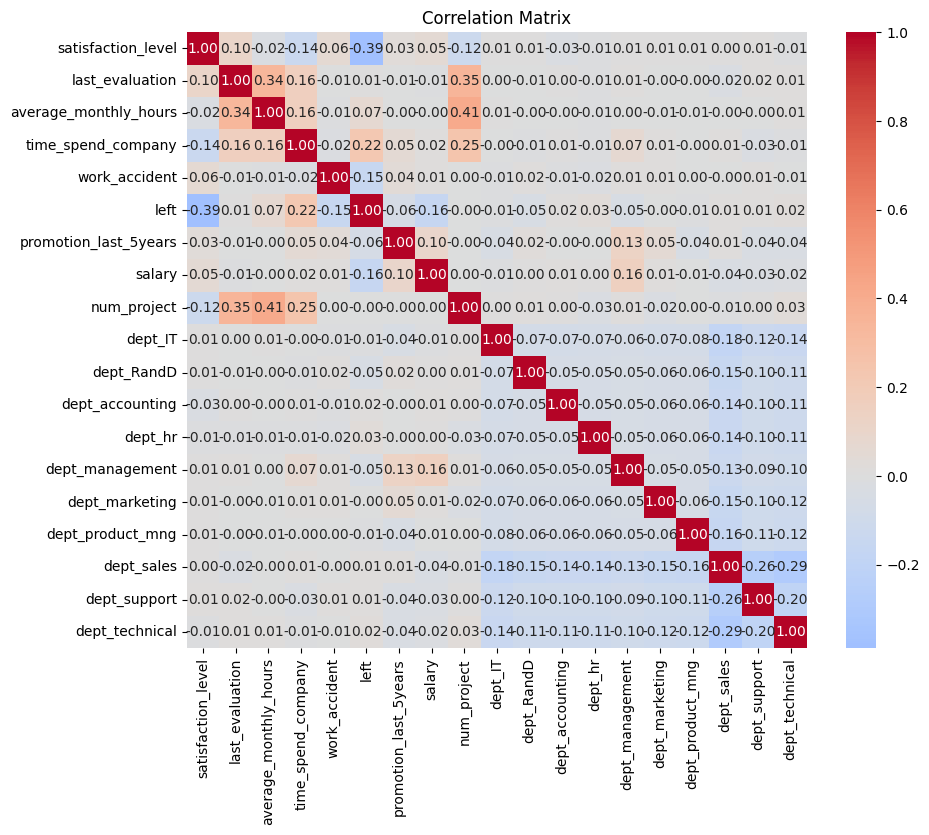

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### What factors most influence salary?
- Does more hours worked result in higher salary?
- Does more years at the company result in higher salary?

#### Does more hours worked result in higher salary?

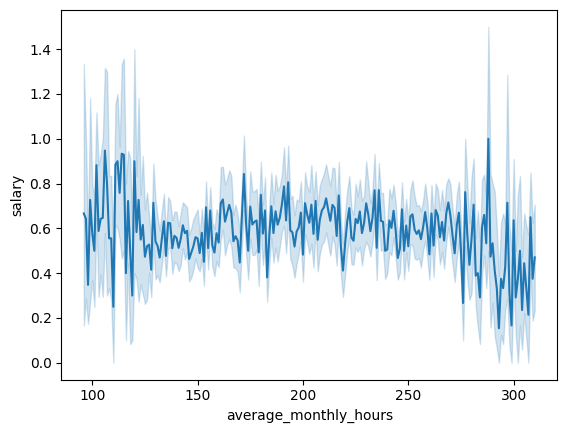

In [21]:
sns.lineplot(data=df, x='average_monthly_hours', y='salary')
plt.show()

It looks like more work hours does **not** lead to a higher salary. There are even some people with more work hours and less salary than those who worked less hours.

#### Does more years at the company result in higher salary?

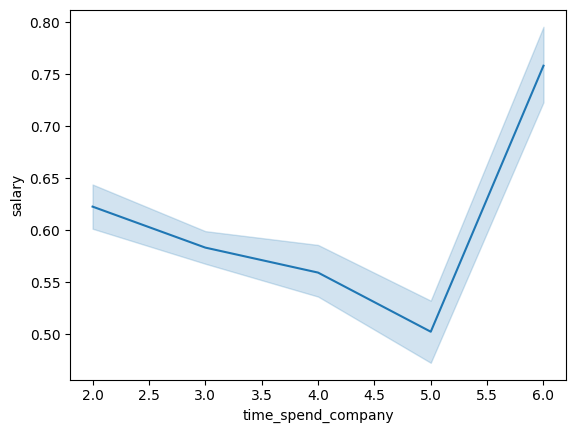

In [37]:
sns.lineplot(data=df, x='time_spend_company', y='salary')
plt.show()

In general, more years at the company does not seem to be related with higher salary, but the difference in salary between employees with 5 and 6 years gets bigger. Maybe this happens due to a promotion?

We should investigate this pattern further by looking for a correlation between years at company, receiving a promotion, and salary increase.

### What factors most influence satisfaction level?
- Does higher salary lead to higher satisfaction?
- Does receiving a promotion have an impact on satisfaction?

#### Does higher salary lead to higher satisfaction?

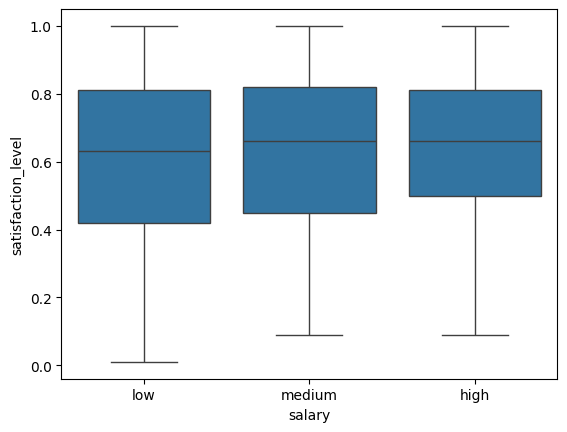

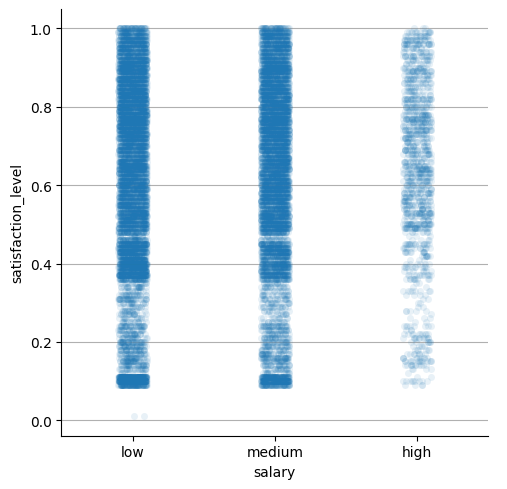

In [22]:
sns.boxplot(data=df, x='salary', y='satisfaction_level')
plt.xticks(ticks=[0, 1, 2], labels=['low', 'medium', 'high'])
plt.show()

sns.catplot(data=df, x="salary", y="satisfaction_level", alpha=0.1)
plt.xticks(ticks=[0, 1, 2], labels=['low', 'medium', 'high'])
plt.grid(visible=True, axis="y")
plt.show()

In [23]:
for salary in df['salary'].unique():
    print(f"{f'low ({salary})' if salary == 0 else f'medium ({salary})' if salary == 1 else f'high ({salary})'}\nCount: {df[df['salary'] == salary]['salary'].count()}\n")

low (0)
Count: 7316

medium (1)
Count: 6446

high (2)
Count: 1237



In [24]:
mean_satisfaction_levels = df['satisfaction_level'].groupby(df['salary']).mean()
print(mean_satisfaction_levels)

salary
0    0.600731
1    0.621817
2    0.637470
Name: satisfaction_level, dtype: float64


The relationship between `salary` and `satisfaction_level` is pretty weak, but it exists. We can observe that:
- Employees with **low** range salaries have **60%** of satisfaction level
- Employees with **medium** range salaries have **62%** of satisfaction level
- Employees with **high** range salaries have **~64%** of satisfaction level

#### Does receiving a promotion have an impact on satisfaction?

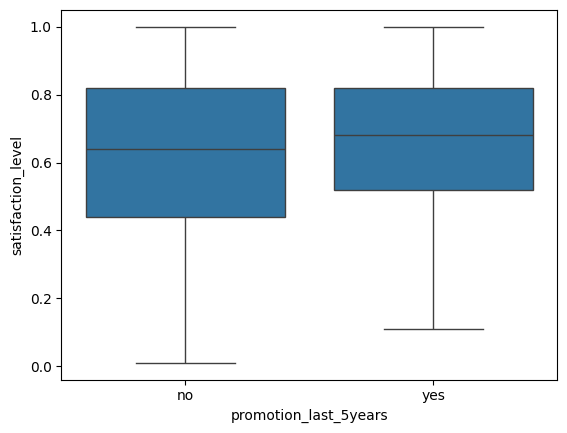

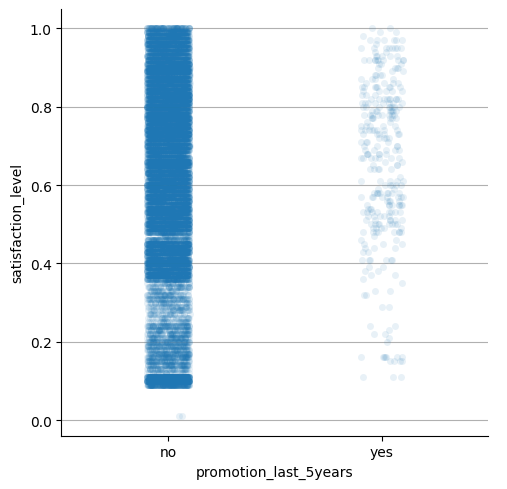

In [25]:
sns.boxplot(data=df, x='promotion_last_5years', y='satisfaction_level')
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
plt.show()

sns.catplot(data=df, x="promotion_last_5years", y="satisfaction_level", alpha=0.1)
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
plt.grid(visible=True, axis="y")
plt.show()

In [26]:
mean_satisfaction_levels = df['satisfaction_level'].groupby(df['promotion_last_5years']).mean()
print(mean_satisfaction_levels)

promotion_last_5years
0    0.611884
1    0.656019
Name: satisfaction_level, dtype: float64


In [27]:
data.loc[(data['time_spend_company'] >= 5) & (data['num_project'] >= 5)]

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,num_project,depto
1,0.80,0.86,262,6,0,1,0,1,5,sales
3,0.72,0.87,223,5,0,1,0,0,5,sales
7,0.92,0.85,259,5,0,1,0,0,5,sales
8,0.89,1.00,224,5,0,1,0,0,5,sales
19,0.76,0.89,262,5,0,1,0,0,5,sales
...,...,...,...,...,...,...,...,...,...,...
14980,0.76,0.89,238,5,0,1,0,2,5,technical
14983,0.72,0.84,257,5,0,1,0,1,5,technical
14985,0.91,0.99,254,5,0,1,0,1,5,technical
14990,0.89,0.88,228,5,1,1,0,0,5,support
